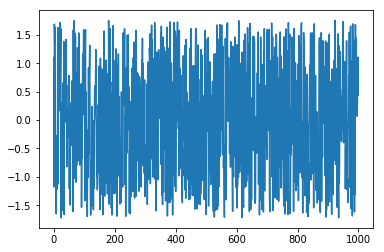

In [11]:
#--- generate a white noise

import random as rnd
import numpy as np
import matplotlib.pylab as plt

N = 1000
rand_seq = np.random.rand(N)
rand_seq -= rand_seq.mean() #--- zero mean
rand_seq /= rand_seq.std() #--- unit variance
plt.plot(rand_seq)

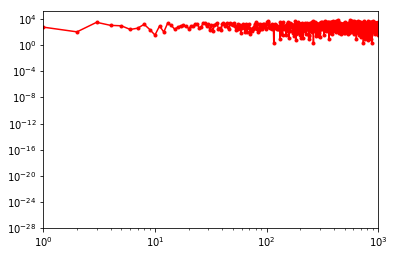

In [12]:
#--- spectrum
plt.xscale('log')
plt.yscale('log')
#plt.ylim( 1, 100000)
plt.xlim( 1, N)
rand_seq_fft_square_mod = np.abs(np.fft.fft(rand_seq))**2
plt.plot(rand_seq_fft_square_mod,'r.-')


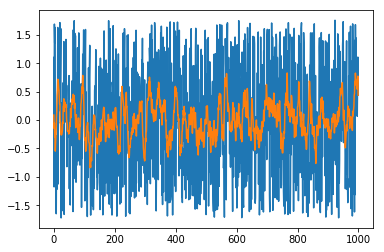

In [13]:
#--- apply a smoothing filter

t_window = 10
rand_seq_copy = rand_seq[ : ]
x=[]
y=[]
for i in xrange(N): #0,N-t_window,t_window):
    i_end = ( i+t_window if i < N - t_window else N )
    arr_slice = rand_seq_copy[i:i_end][:]
    x.append(i)
    assert not np.isnan(np.mean(arr_slice)),'i=%s,arr_slice=%s'%(i,arr_slice)
    y.append(np.mean(arr_slice))
plt.plot(x,rand_seq)
plt.plot(x,y)


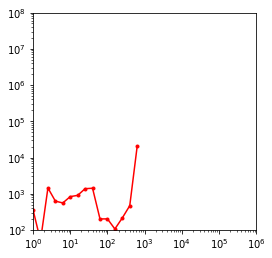

In [14]:
from math import *
#--- spectrum
y=np.array(y)
y -= y.mean() #--- zero mean
y /= y.std() #--- unit variance
y_fft_square_mod = np.abs(np.fft.fft(y))**2

x=range(1,len(y_fft_square_mod))
y_fft_square_mod=y_fft_square_mod[1:]
#--- binning
hist, edges = np.histogram(x,bins=np.logspace(log(min(x),10),log(max(x),10),16),weights=y_fft_square_mod)
hist_count, edges = np.histogram(y_fft_square_mod,bins=np.logspace(log(min(x),10),log(max(x),10),16))
hist /= hist_count
#help(np.histogram)
#--- plot
plt.figure(figsize=(4,4))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e6)
plt.ylim(1e2,1e8)
#plt.plot(y_fft_square_mod,'r.-')
plt.plot(edges[:-1], hist, 'r.-')